In [3]:
# Датасет - Significant Earthquakes, 1965-2016
# Ссылка - https://www.kaggle.com/datasets/usgs/earthquake-database
# Содержание - Данные о землетрясениях магнитудой выше 5.5 с 1965 по 2016 год
# Предметная область - Исследования землетрясений
# Источних данных - Исследования геологической службы США
# Характер данных - Реальные данные
# Задача анализа - Выявление закономерностей между параметрами землетрясение и его магнитудой

# Датасет содержит множество атрибутов не представляющих интереса в работе
# Будут использоваться следующие атрибуты:
# Date - Дата возникновения землетрясения (дата)
# Time - Время возникновения землетрясения (дата)
# Latitude - Широта возникновения землетрясения (число)
# Longitude - Долгота возникновения землетрясения (число)
# Depth - Глубина возникновения землетрясения (число)
# Magnitude - Магнитуда землетрясения (число)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv = pd.read_csv('database.csv', sep=',')
data = pd.DataFrame(csv)[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]

# Перевод даты и времени в соответствующий формат, любые необработанные данные получают тип NaT (Not a Time)
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y', errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce')

In [5]:
# Средние значения и СКО
for col in ['Latitude', 'Longitude', 'Depth', 'Magnitude']:
    mean = data[col].mean()
    std = data[col].std()
    print(f'{col}: Среднее значение = {mean:.3f}, СКО = {std:.3f}')

Latitude: Среднее значение = 1.679, СКО = 30.113
Longitude: Среднее значение = 39.640, СКО = 125.512
Depth: Среднее значение = 70.768, СКО = 122.652
Magnitude: Среднее значение = 5.883, СКО = 0.423


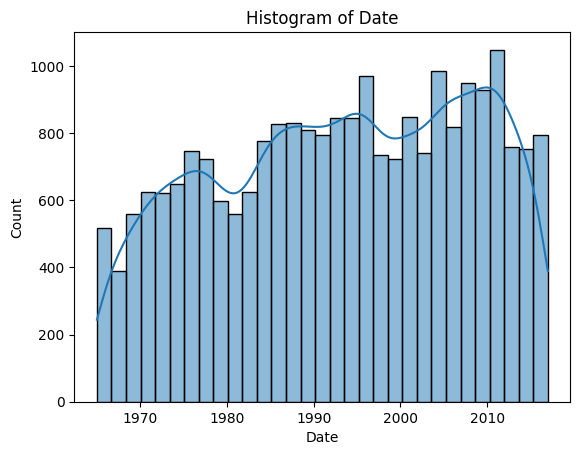

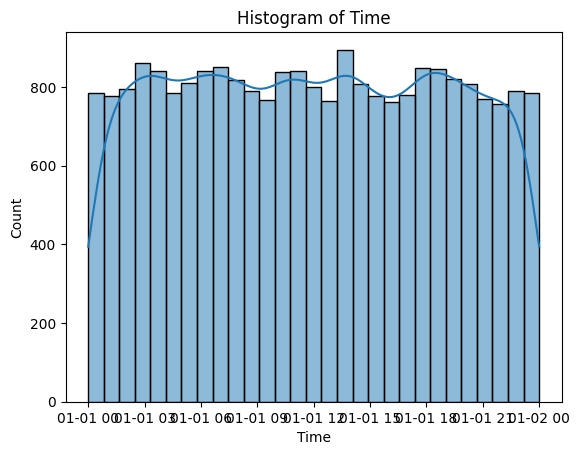

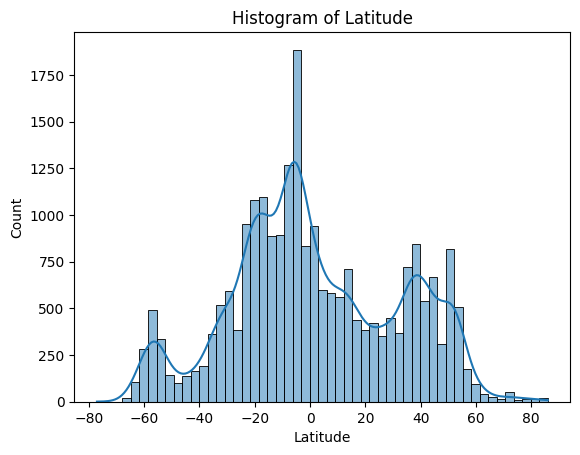

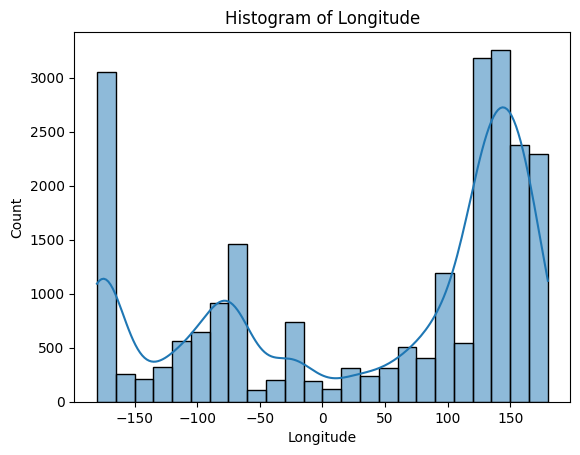

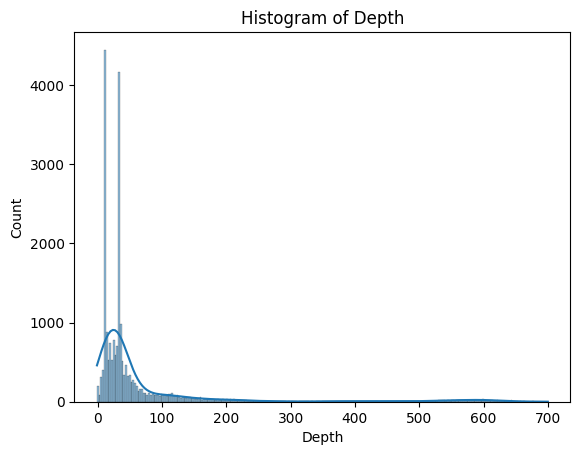

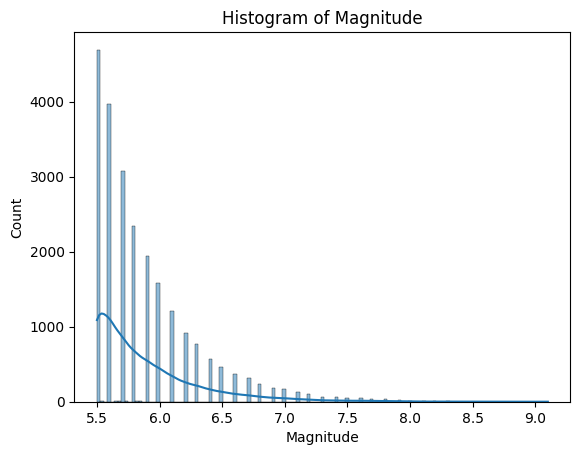

In [6]:
# Гистограммы распределения значений
for col in ['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']:
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.show()
    
# Все значения на графиках находятся в корректных диапазонах, выбросов нет

# Выводы на основании полученных графиков:

# Дата | Количество зарегистрированных землетрясений растет со временем

# Время | Вероятность землятрясения не зависит от времени дня

# Широта | Большее количество землятрясений происходит возле линии экватора

# Долгота | Большее количество землятрясений происходит в районе 130 - 150 меридиана 
# (в месте соприкосновения тихоокенаской литосферной плиты с другими)

# Глубина | Практически все очаги землетрясения расположены ниже 100 км 

# Магнитуда | Землетрясения с меньшей магнитудой более вероятны

In [7]:
# Поиск пропущенных значений
print('Пропущенные значения:')
for col in data.columns:
    num_missing = data[col].isnull().sum()
    if num_missing > 0:
        print(f'{col}: {num_missing}')

# Заменим пропущенные значение средним значением столбца
data.fillna(data.mean(numeric_only=True), inplace=True)

Пропущенные значения:
Date: 3
Time: 3


In [8]:
# Расчет корреляции между основными параметрами и магнитудой
corr_matrix = data.corr()
corr_with_mag = corr_matrix['Magnitude'].sort_values(ascending=False)
print('Коэффициенты корреляции:')
print(corr_with_mag)

# Прямая зависимость между широтой, долготой, глубиной и магнитудой практически отсутствует

Коэффициенты корреляции:
Magnitude    1.000000
Longitude    0.038579
Latitude     0.034987
Depth        0.023457
Name: Magnitude, dtype: float64


/tmp/ipykernel_28655/920464557.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


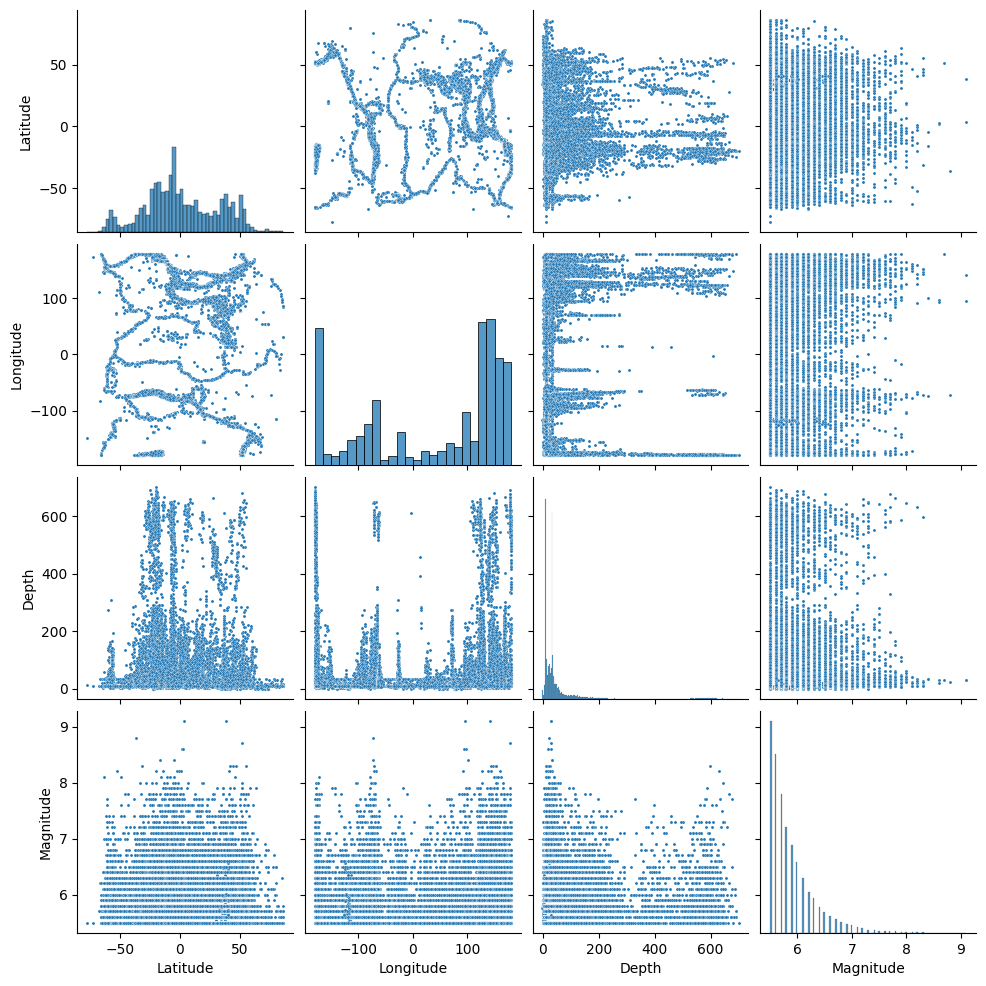

In [9]:
# Матрица графиков рассеивания для основных параметров
sns.pairplot(data, vars=['Latitude', 'Longitude', 'Depth', 'Magnitude'], plot_kws={'s': 5})
plt.show()

# Выводы на основании полученных графиков:

# График рассеивания широты относительно долготы даёт карту мира с точками землетрясений на ней,
# с её помощью можно определить расположение литосферных плит

# Сила землетрясения практически не зависит от широты и долготы

# Самые мощные землетрясения имеют очаг на глубине от 0 до 100 км или от 500 до 700 км

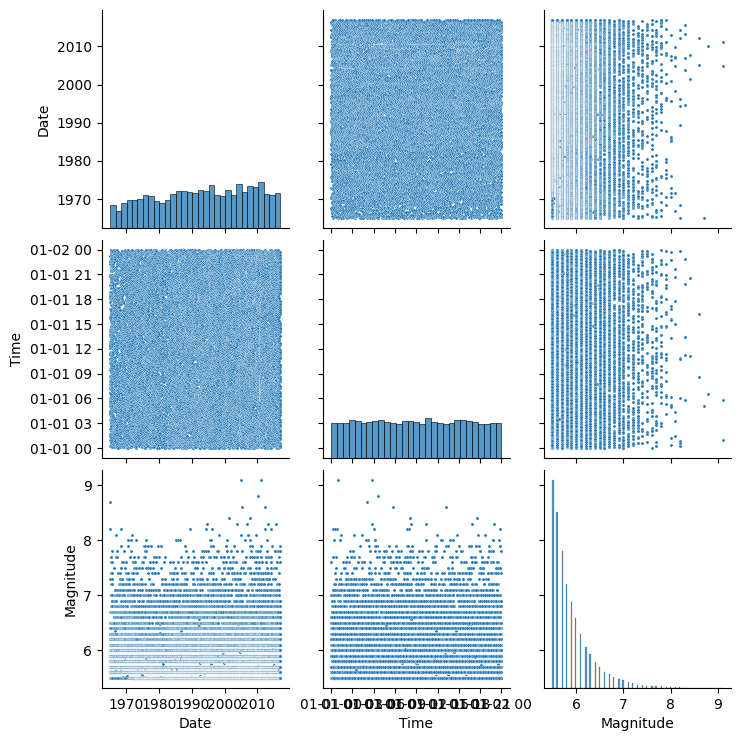

In [10]:
# Матрица графиков рассеивания для параметров даты и времени
sns.pairplot(data, vars=['Date', 'Time', 'Magnitude'], plot_kws={'s': 5})
plt.show()

# Выводы на основании полученных графиков:

# Как и было сказано ранее количество регистрируемых землетрясений растет со временем

# Вероятность возникновения землетрясения не зависит от времени дня